In [ ]:
import pandas as pd
a=pd.read_csv('/content/chronic kidney disease.zip')
print(a)
print(a.head())
print(a.columns)
target_variable = 'Class'
features = a.columns[a.columns != target_variable]
print('Target Variable:', target_variable)
print('Features:',features)

       Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0    80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1    50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2    80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3    70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4    80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   
..    ...    ...  ...  ...  ...   ...  ...     ...   ...   ...     ...   ...   
395  80.0  1.020  0.0  0.0  1.0  49.0  0.5  150.00  4.90  15.7  6700.0  4.90   
396  70.0  1.025  0.0  0.0  1.0  31.0  1.2  141.00  3.50  16.5  7800.0  6.20   
397  80.0  1.020  0.0  0.0  1.0  26.0  0.6  137.00  4.40  15.8  6600.0  5.40   
398  60.0  1.025  0.0  0.0  1.0  50.0  1.0  135.00  4.90  14.2  7200.0  5.90   
399  80.0  1.025  0.0  0.0  1.0  18.0  1.1  141.00  3.50  15.8  6800.0  6.10   

     Htn  Class  
0    1.0      1  
1  

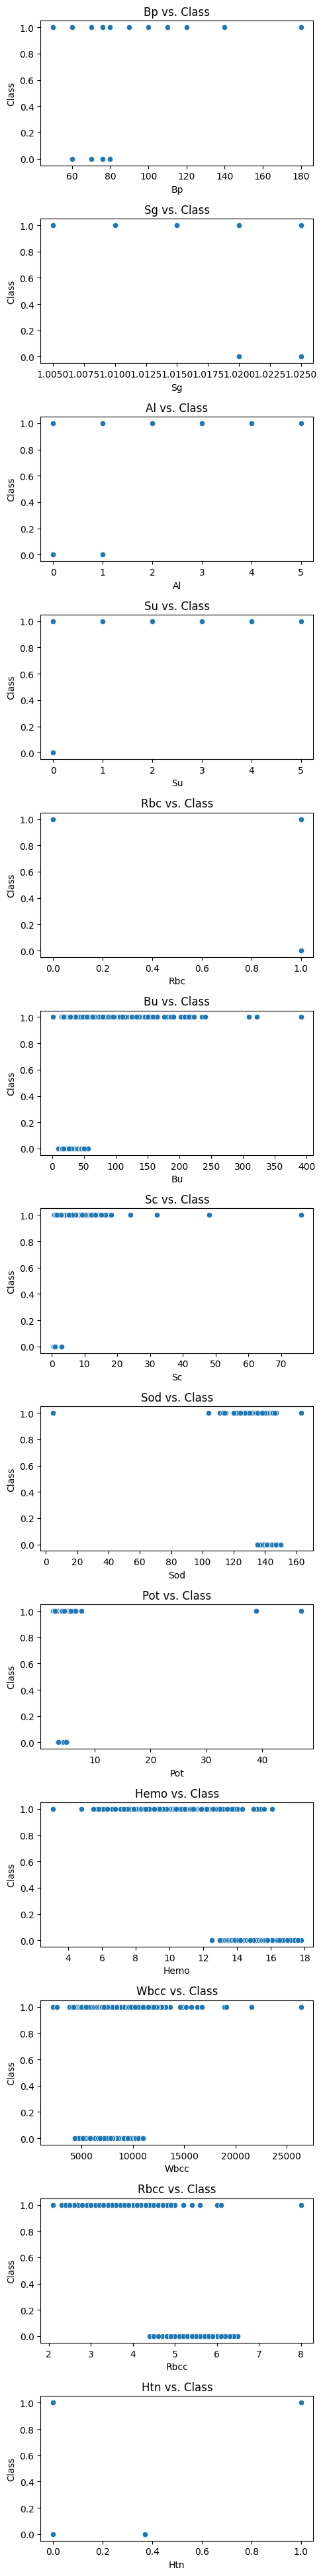

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
target_variable = 'Class'
feature_names = [col for col in a.columns if col != target_variable]
num_plots = len(feature_names)
fig, axes = plt.subplots(num_plots, 1, figsize=(5, 3*num_plots))
for i, feature in enumerate(feature_names):
    sns.scatterplot(data=a, x=feature, y=target_variable, ax=axes[i])
    axes[i].set_title(f'{feature} vs. {target_variable}')
plt.tight_layout()
plt.show()

In [ ]:
y=a['Class']
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Class, Length: 400, dtype: int64

In [ ]:
X=a.drop('Class',axis=1)
X

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Perceptron': Perceptron(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [ ]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
results_df = pd.DataFrame(list(results.items()), columns=['Algorithm', 'Accuracy'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy of Different Algorithms:")
print(results_df)

Accuracy of Different Algorithms:
             Algorithm  Accuracy
0  Logistic Regression    0.9625
1                  SVM    0.6500
2           Perceptron    0.3500
3                  KNN    0.7250
4        Decision Tree    0.9875


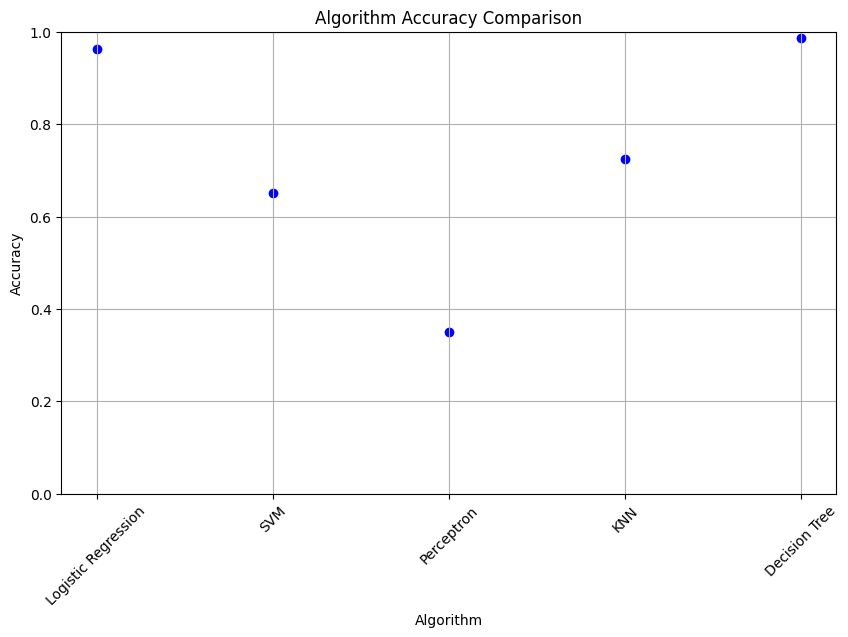

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Algorithm'], results_df['Accuracy'], color='blue')
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[28  0]
 [ 1 51]]


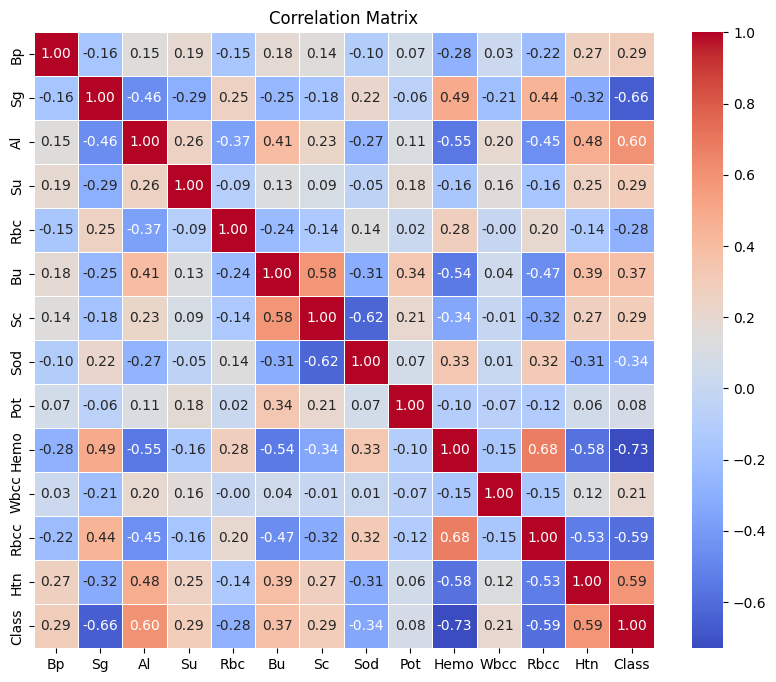

In [ ]:
import seaborn as sns
corr = a.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import resample
def bootstrap_accuracy(model, X_train, y_train, X_test, y_test, n_iterations):
    accuracies = []
    for i in range(n_iterations):
      X_resampled, y_resampled = resample(X_train, y_train, random_state=i)
      model.fit(X_resampled, y_resampled)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      accuracies.append(accuracy)
    return accuracies

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Perceptron': Perceptron(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

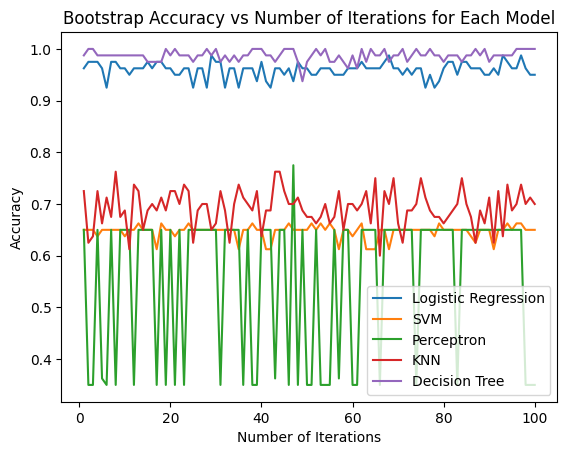

In [ ]:
n_iterations = 100
for model_name, model in models.items():
    accuracies = bootstrap_accuracy(model, X_train, y_train, X_test, y_test, n_iterations)
    plt.plot(range(1, n_iterations + 1), accuracies, label=model_name)
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Bootstrap Accuracy vs Number of Iterations for Each Model')
plt.legend()
plt.show()